# OSD decoding
Fix $n$ and a linear binary code, $\mathcal{C}$ of dimension $k$. So $\mathcal{C} \subset F^n_2$ such that $\mathcal{C} \cong F_2^k$ and in particular has $2^k$ elements. 
Choose a generator matrix $G$, meaning a matrix which row space spans the code, and a parity matrix $H$, namely a matrix which kernel is the code.
By definition of the parity matrix, if $c\in \mathcal{C}$ then $H \cdot c = \vec{0}$. Generally we call the resulting vector $H \cdot w = s$ the syndrome. 

Excersize:
Show that if $v,w$ have the same syndrome, then they differ by a codeword.

For a set of indices, $I \subset {1,..n} = [n]$, we say that $I$ is an information set for the code $\mathcal{C}$, if:

$$C_I:=\{c_{i\in I} : c\in \mathcal{C}\} = F_2^k$$

Meaning, that when we restrict each $n$ dimensional codeword $c$ to the set of indices in $I$, and go over all codewords in $\mathcal{C}$, we get the set $F_2^k$, and in fact we get an isomorphism of vector spaces between $\mathcal{C}$ and $F_2^k$ which is a projection.

Excersize:
1.  Show that for an information set $I$, the map: $P_I: \mathcal{C} \rightarrow F_2^k$ defined by: $P_I(c) = P_I(c_{i\in [n]}) = c_{i\in I}$ is linear, one to one and onto, i.e., it is an isomorphism of vector spaces.
2. Conclude that if $P_I(c) = P_I(c')$ then $c=c'$

Every pair of information set and syndrome for the code $\mathcal{C}$ and $H$ gives us an encoding $E(x) = E(s,I,x):F_2^k \rightarrow F^n_2$: first, the bijection $P_I$ picks one representative of $\mathcal{C}$ - the one that agrees with x over all indices in $I$. Then the rest of the values for indices outside $I$ are uniqely determined by the syndrome.


Now let's assume we have a word $c' = c + e$, and we want to recover $c$. We also have an estimate $\hat{e}$ of $e$, but we find that $H \cdot \hat{e} \neq H \cdot e$, so we have evidence that $\hat{e} \neq e$. 
If we knoew of an information set $I$ such that $e_I = \hat{e}_I$, i.e., they agree on the set $I$, then the encoding $E(s = H\cdot e,I,\hat{e})$ would find us the right $e$.

Suppose further that our estimate of $\hat{e}$ was cooked from probabilities $p_i$, where $p_i$ is the probability of the error $e$ being $1$ at index $i$, i.e.:
$$p_i = P(e_i = 1)$$
And we decide that we estimate $\hat{e}$ using: $e_i = 1$ if $p_i >= 1/2$ and 0 otherwise.

This is why we introduce the notion of a reliability $\rho$ of an index $i$:
$$\rho_i = P(\hat{e}_i = e_i)$$
Which using our estimation rule means 
$$\rho_i = max(p_i, 1-p_i)$$
(since if $p_i$ is the bigger one, we decided $\hat{e_i}$ = 1, and otherwise, i.e. $1-p_i$  is bigger, and we decided $\hat{e_i}=0$ but either way we are as certain as $max(p_i, 1-p_i)$). 



BIN:



So suppose we knew, that the error part of $x = c + e$ occures outside some information set $J$, then we could find out the error precisely usining $E(s,J,\vec{0})$ for $s=H \cdot (c+e) = H \cdot e$


[a00, a01, a02, a03, a10, a11, a12, a13, a20, a21, a22, a23, a30, a31, a32, a33]
Matrix([[a00, a01, a02, a03], [a10, a11, a12, a13], [a20, a21, a22, a23], [a30, a31, a32, a33]])


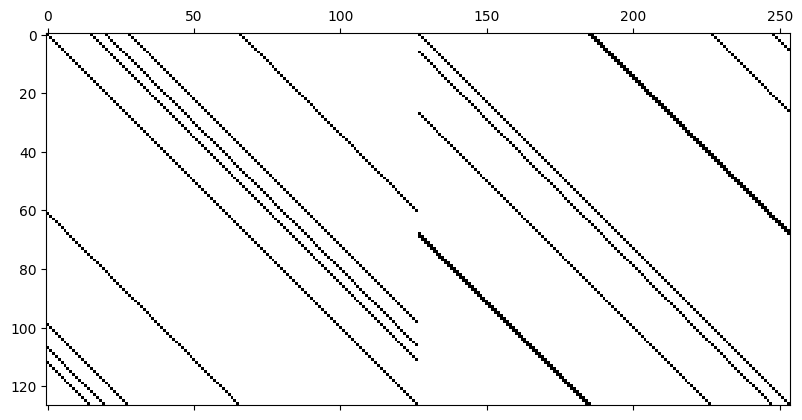

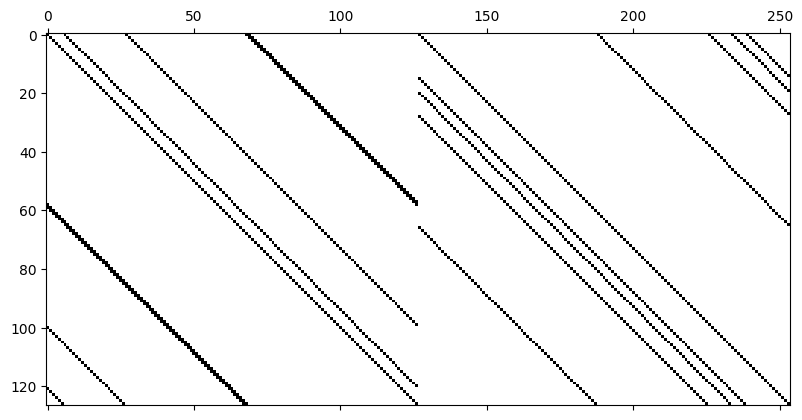

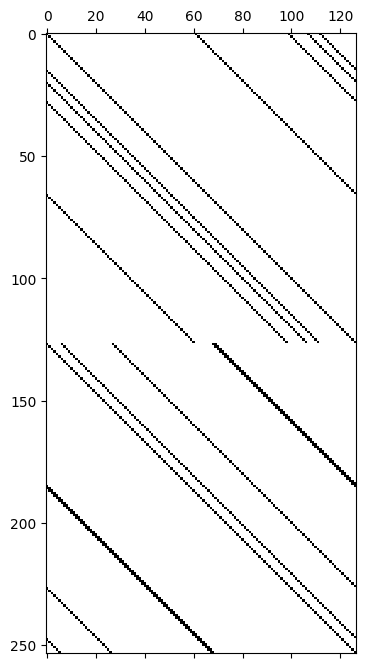

: 

In [ ]:

from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy import symbols, shape, init_printing, Basic, And, Xor, Not, simplify_logic
import numpy as np
import matplotlib.pyplot as plt
from polynomialCodes import A1_HX, A1_HZ, A2_HX, A2_HZ, A3_HX, A3_HZ, A4_HX, A4_HZ, A5_HX, A5_HZ,  A6_HX, A6_HZ
seed = 777
localRandom = np.random.RandomState(seed)
from numpy.linalg import matrix_rank



code = A1_HX
plt.matshow(code, cmap='Greys', interpolation='nearest')
init_printing(use_unicode=True)
plt.matshow(A1_HZ, cmap='Greys', interpolation='nearest')
k = 3
hSymbolic = {}
rowList = []
# for i in range(k):
#     newRow = []
#     for j in range(k):
#         hSymbolic[f"h{i}{j}"] = symbols(f"h{i}{j}")
#         #newRow.append(locals()[f"h{i}{j}"] = symbols(f"h{i}{j}"))
#     rowList.append(newRow)
# H = Matrix(rowList)
# print(H)
rows = 4
cols = 4

def generateSymbolicMatrix(rows, cols):
    symbolsList = []
    symbolicRows = []

    for i in range(rows):
        newRow = []
        for j in range(cols):
            stringLiteral = f"a{i}{j}"
            s = symbols(stringLiteral)
            symbolsList.append(s) 
            newRow.append(s)
        symbolicRows.append(newRow)
    print(symbolsList)
    matrix = Matrix(rows, cols, symbolsList)
    return matrix, symbolsList, symbolicRows

matrix, symbolsList, symbolicRows = generateSymbolicMatrix(rows, cols)
print(matrix)
plt.matshow(A1_HX.T, cmap='Greys', interpolation='nearest')


In [12]:

def symbolicDeterminant(matrix):
    # Calculate the determinant of a symbolic matrix over F(2) using the recursive definition: \xor (-1)^{1+j} matrix_{1j} det(M_{1j})
    if matrix.shape[0] == 2:
        return Xor(And(matrix[0,0],matrix[1,1]), And(matrix[0,1], matrix[1,0]))
    else:
        expression = And(matrix[0,0], symbolicDeterminant(matrix[1:,1:]))
        for j in range(1, matrix.shape[1]):
            #print(Matrix.hstack(matrix[1:,:j], matrix[1:,j+1:]))
            expression = Xor(expression, And(matrix[0,j] , symbolicDeterminant(Matrix.hstack(matrix[1:,:j],matrix[1:,j+1:]))))
    return expression

def symbolicCofactor(matrix):
    # Calculate the cofactor matrix of a symbolic matrix over F(2)
    #cofactorsList = [f"c{i}{j}" for i in range( matrix.shape[0]) for j in range(matrix.shape[1])]
    #cofactorMatrix = Matrix(matrix.shape[0], matrix.shape[1], cofactorsList)
    #print(cofactorMatrix)
    #for i in range(cofactorMatrix.shape[0]):
    #    for j in range(cofactorMatrix.shape[1]):
    #        print(isinstance(cofactorMatrix[i,j], Basic))
    cofactorsList = []
    for i in range(matrix.shape[0]):
        newRow = []
        for j in range(matrix.shape[1]):
            minor = matrix.copy() # Not very efficient, but good enough for one time use.
            minor.col_del(j)
            minor.row_del(i)
            newRow.append(symbolicDeterminant(minor))
            #print(f"For i=={i} , j=={j}, isinstance: {isinstance(detOfMinor, Basic)}")
            ##print(cofactorMatrix[i,j])
            #cofactorMatrix.subs(cofactorMatrix[i,j], detOfMinor)# (symbolicDeterminant(minor), cofactorMatrix[i,j])
        cofactorsList.append(newRow)
    return cofactorsList


cofactorsList = symbolicCofactor(matrix)
print(cofactorsList)
#expr = cofactorsList[0][0]
#print(expr.is_Boolean)
#print(symbolicDeterminant(matrix))
deter = symbolicDeterminant(matrix)
print(deter)
print(deter.is_Boolean)
print(symbolsList[0])
deter.subs({symbolsList[0]}, True)
#print(symbolsList[0] == f"{a0}")
deter.subs(symbolsList[0], True)
#deter.subs({symbolsList[0]: True})
cofactorsList[0][0].subs(symbolsList[0], True)


A1_HX
matrix_rank(A1_HX)
A1_HX.shape

symbolicMatrix, symbolsList, symbolicRows = generateSymbolicMatrix(127,127)
determinant = symbolicDeterminant(symbolicMatrix)


[[(a11 & ((a22 & a33) ^ (a23 & a32))) ^ (a12 & ((a21 & a33) ^ (a23 & a31))) ^ (a13 & ((a21 & a32) ^ (a22 & a31))), (a10 & ((a22 & a33) ^ (a23 & a32))) ^ (a12 & ((a20 & a33) ^ (a23 & a30))) ^ (a13 & ((a20 & a32) ^ (a22 & a30))), (a10 & ((a21 & a33) ^ (a23 & a31))) ^ (a11 & ((a20 & a33) ^ (a23 & a30))) ^ (a13 & ((a20 & a31) ^ (a21 & a30))), (a10 & ((a21 & a32) ^ (a22 & a31))) ^ (a11 & ((a20 & a32) ^ (a22 & a30))) ^ (a12 & ((a20 & a31) ^ (a21 & a30)))], [(a01 & ((a22 & a33) ^ (a23 & a32))) ^ (a02 & ((a21 & a33) ^ (a23 & a31))) ^ (a03 & ((a21 & a32) ^ (a22 & a31))), (a00 & ((a22 & a33) ^ (a23 & a32))) ^ (a02 & ((a20 & a33) ^ (a23 & a30))) ^ (a03 & ((a20 & a32) ^ (a22 & a30))), (a00 & ((a21 & a33) ^ (a23 & a31))) ^ (a01 & ((a20 & a33) ^ (a23 & a30))) ^ (a03 & ((a20 & a31) ^ (a21 & a30))), (a00 & ((a21 & a32) ^ (a22 & a31))) ^ (a01 & ((a20 & a32) ^ (a22 & a30))) ^ (a02 & ((a20 & a31) ^ (a21 & a30)))], [(a01 & ((a12 & a33) ^ (a13 & a32))) ^ (a02 & ((a11 & a33) ^ (a13 & a31))) ^ (a03 & ((a11 &

KeyboardInterrupt: 

In [ ]:
p_error = 0.05
error = localRandom.choice([0,1], size=code.N, replace=True, p=[1 - p_error, p_error])